In [3]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
import seaborn
# style.use('seaborn')
# %matplotlib inline

In [5]:
# Load the global temperature dataset and store it in a dataframe
orig_temp_data = pd.read_csv('/Users/michealmccloskey/Desktop/Climate_change_disasters/datasets/GlobalTemperatures.csv')
global_temp_df = orig_temp_data.copy()

global_temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


The global temperature dataset contains monthly data. To streamline analysis, we can aggregate this data to an annual level by calculating the average temperature for each year. The resulting dataset will focus on the yearly 'LandAndOceanAverageTemperature' without sacrificing essential temperature information.

In [6]:
# Choose the required columns
global_temp_df = global_temp_df[['dt', 'LandAndOceanAverageTemperature']]

# Set the date column as a DateTimeIndex and sort it
global_temp_df['dt'] = pd.to_datetime(global_temp_df['dt'])
global_temp_df.set_index('dt', inplace = True)
global_temp_df.sort_index(axis = 0, inplace = True)

# Resample annually and rename index & columns
global_temp_df = global_temp_df.resample('A').mean()
global_temp_df.rename(columns = {'LandAndOceanAverageTemperature': 'AnnualAverageTemp'}, inplace = True)
global_temp_df.index.rename('Year', inplace = True)
global_temp_df.index = global_temp_df.index.year

In [7]:
global_temp_df.head()

,AnnualAverageTemp
Year,
1750,NaN
1751,NaN
1752,NaN
1753,NaN
1754,NaN


In [8]:
# Check the number of missing values and the corresponding years
print(global_temp_df.isnull().sum())
print(global_temp_df[global_temp_df['AnnualAverageTemp'].isnull()].index)

AnnualAverageTemp    100
dtype: int64
Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761,
       1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773,
       1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785,
       1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797,
       1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821,
       1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833,
       1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849],
      dtype='int32', name='Year')


The global temperature dataset contains monthly data from 1750 onwards, however, it appears that temperature values are only available starting from 1850. Therefore, I will exclude the data prior to 1850 and aggregate the remaining data to an annual level by calculating the average temperature for each year. This will provide a focused dataset on yearly 'LandAndOceanAverageTemperature' for analysis.

In [10]:
global_temp_df.dropna(inplace = True)
global_temp_df.head()

,AnnualAverageTemp
Year,
1850,14.867167
1851,14.991833
1852,15.006500
1853,14.955167
1854,14.991000


To accurately represent temperature patterns, temperature anomalies will be calculated instead of using absolute temperature values. An anomaly is the difference between a specific temperature and a baseline. Here, the baseline is the average temperature between 1951 and 1980. By calculating the anomaly for each data point and storing it in a new column, we can effectively analyze temperature changes relative to this baseline, enhancing the understanding of climate trends. The original absolute temperature column will be removed from the dataset.

In [12]:
# Calculate the global baseline temperature
global_ref_temp = global_temp_df.loc['1951':'1980'].mean()['AnnualAverageTemp'] 

# Create the temperature anomaly column
global_temp_df['Temperature Anomaly'] = global_temp_df['AnnualAverageTemp'] - global_ref_temp
global_temp_df.drop(['AnnualAverageTemp'], axis = 1, inplace = True)

global_temp_df.head()

,Temperature Anomaly
Year,
1850,-0.432381
1851,-0.307714
1852,-0.293047
1853,-0.344381
1854,-0.308547


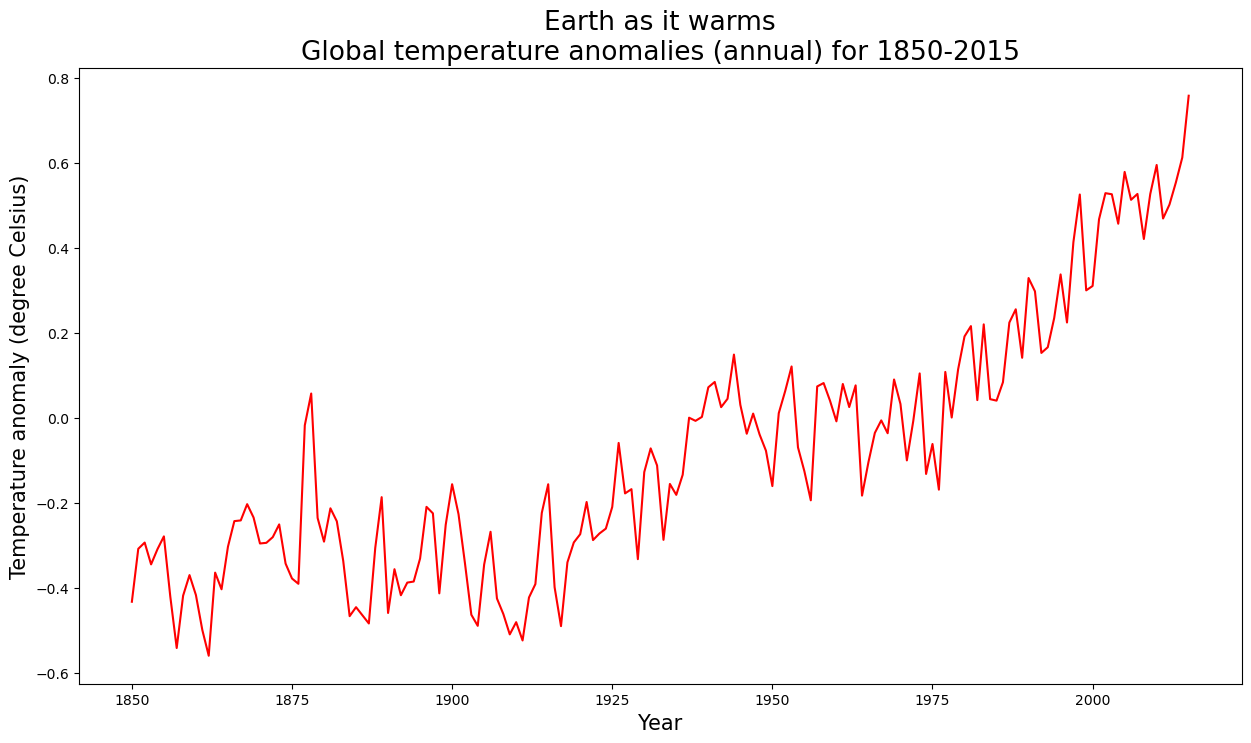

In [14]:
# Plot the temperature anomaly
plt.figure(figsize = (15, 8))

plt.plot(global_temp_df['Temperature Anomaly'], 'r')

plt.title('Earth as it warms\nGlobal temperature anomalies (annual) for 1850-2015', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature anomaly (degree Celsius)', fontsize = 15)

plt.show()

A visual representation of temperature anomalies over time clearly illustrates a warming trend, particularly pronounced since the 1920s. The data reveals that in 2015, the global temperature was 0.76 degrees Celsius higher than the 1951-1980 average. These findings align with the established scientific consensus of global warming.

